# Was ist Machine Learning?

> Machine Learning ist die Wissenschaft, Computer so zu programmieren, dass sie anhand von Daten lernen.

Gelernt wird mit Trainingsdaten(einem Trainingsdatensatz) wobei jedes Trainingsbeispiel auch Trainingsdatenpunkt-/Instanz genannt wird

# Warum wird ML verwendet?

ML wird verwendet, wenn:
* die Aufgabe zu komplex für herkömmliche Aufgaben ist  
* eine Menge Handarbeit und lange Regeln geschrieben werden müssten
* kein bekannter Algorithmus für diese Aufgabe existert
* die Aufgabe mit sich stark verändernden Daten beschäftigt(ML ist Anpassungsfähig)
* man riesige Datenmengen besitzt und daraus  erkenntnisse gewinnen soll.(auch hier ist die Aufgabenstellung komplex)

# Arten von ML

Es wird unterschieden nach:
* Überwachtes, unüberwachtes und halbüberwachtes Lernen sowie Reinforcement Learning
* ständig dazu lernen(Online-learning) oder nicht(Batch-Learning)
* Vergleicht der Algorithmus neue Datenpunkte mit bereits bekannten oder erkenner er Muster in den Daten

## Überwachtes Lernen

Die Trainingsdaten sind **gelabelt**(sie enthalten die gewünschten Lösungen)

### Beispiele

* Spamfilter -> **Klassifikation**
* Vorhersagen eine Preises(nummerische Grösse) aufgrund von Merkmalen(**Prädikatoren**) -> **Regression**


### Algorithmen

* **k-nearest-Neighbors**
* **linear Regression**
* **logistic Regression**
* **Support Vector Machines**
* **decision trees / random forests**
* **neural networks**

## Unüberwachtes Lernen

Es wird versucht ohne Anleitung zu lernen. Die Daten sind nicht gelabelt.

### Beispiele

* Visualisierung -> Um grosse Datenmengen zu verstehen
* Clustering -> Einteilung anhand von grossen Datenmengen vornehmen
* Erkennen von Anomalien
    * Abfangen von Produktionsfehlern und entfernen von Ausreissern in Datensätzen
* Lernen von Assoziationsregeln

### Algorithmen

* **Clustering**
    * k-Means
    * hierarchical Cluster Analysis -> HCA
    * Expectaiton Maximation
* Visualizing and Dimensionreduction
    * Principal component analysis -> PCA
    * Kernel PCA
    * locally-linear Embedding(LLE)
    * t-distributed stochastic neighbor embedding
* learning with assoziation rules
    * apriori
    * eclat

### Dimensionsreduktion

Die Daten vereinfachen, ohne Informationen zu verlieren.  
Auch **Extraktion von Merkmalen** genannt.


## Halbüberwachtes Lernen

Der Grossteil der Trainingsdaten sind **nichtt** gelabelt, der kleine Teil dafür.
Meist sind halbüberwachte Algorithmen Mischungen aus Überwachten- und Unüberwachten Algorithmen, diese werden einfach kobiniert für ein besseres Resultat.

### Beispiele

* Google Photots erkennt mithilfe eines unüberwachten lernens, dass eine Person auf mehreren Fotos sichtbar ist. Aber um zu lernen, wie diese Person heisst, braucht es mindestens einen gelabelten Datensatz mit dem Namen.

### Algorithmen

* Wie bereits erwähnt, sind dies meist Kombinationen von Überwachtem- und Unüberwachtem Lernen.


## Reinforcement Learning / Verstärkendes Lernen

Der **Agent** hat verschiedene Möglichkeiten zu handeln.  
Diese führt er aus und wird danach **belohnt oder bestraft**(mit negativen Belohnungen).  
Durch diese Erfahrungen kann der Agent seine **Policy/Strategie** anpassen und weiss das nächste mal, welches die richtige Entscheidung ist.  


# Batch Learning

Beim Batch-Lernen wird das System mit allen verfügbaren Daten trainiert und danach kann es verwendet werden.  
Ein solches System kann allerding nicht mit neuen Daten gefüttert/erweitert werden.  
Wenn das System trotzdem mit neuen Trainingsdaten erweitert werden soll, so muss es nochmals mit allen alten **und** den neuen Trainingsdaten trainiert werden.  
Dies benötigt sehr viel ressource, kann teuer werden und das trainierte System ist nicht anpassungsfähig.

# Online Learning

Die Trainingsdaten werden als erstes in kleine Stücke(batches) aufgeteilt, welche dann nacheinander trainiert werden und nach dem Training verworfen werden können, ausser man möchte einen alten Zustand wiederherstellen können.  
Das Aufteilen wird auch **out-of-core-lernen** genannt. Es werden weniger Ressourcen als beim Batch-Lernen benötigt.  

Ein Vorteil hier ist auch, das das System anpassungsfähig an neue Daten ist.  
Die Anpassungsfähigkeit kann eingestellt werden mithilfe einer **Lernrate**.
Eine hohe Lernrate führt dazu, dass neues schnell angewendet und altes schnell vergessen wird.  
Eine tiefe sorgt im Gegenzug für eine gewisse Trägheit des System.  

Bei einer hohen Lernrate ist Vorsicht geboten, da Anomalien oder gefälschte Trainingsdaten die Qualität beeinflussen. Ein solches System sollte überwacht werden oder Anomalien zuvor entfernt werden.

# Instanzbasiertes Lernen

Das System wird mit den Trainingsdaten trainiert und lernt diese dadurch "Auswendig".  
Zusätzlich wird ein **Ähnlichkeitsmass** festgelegt. -> Bei **k-nearest-Neighbors** etwa die Anzahl Nachbarn **k**.  
Mit diesen zwei Dingen kann Verallgemeinert werden und neue Datensätze können vorhergesagt werden.(aufgrund der Ähnlichkeit mit bereits Trainierten Daten).

# Modellbasiertes Lernen

Das System versucht aus den Trainingsdaten ein Modell zu erstellen, welches auf möglichst alle Trainingsdaten möglichst gut zutrifft. Dieses Modell kann etwa eine lineare Gleichung sein. Neue Datensätze können in die Gleichung eingesetzt und somit vorhergesagt werden. Ein Beispiel ist die **Lineare Regression**.  
Die beste Gleichung wird durch den Algorithmus ermittelt.

Der Algorithmus muss die Gleichung anhand der Trainingsdaten verbessern. Dazu muss er erst in der Lage sein die **Leistung der aktuellen Gleichung** zu messen.  
Dies wird mit einer  
* **Kostenfunktion** -> Wie schlecht ist das Modell?  
* Oder mit einer **Nutzenfunktion** -> Wie gut ist das Modell? /Güte des Modells

geprüft.

## Lineare Gleichung

Die Parameter **m** und **q** werden ermittelt um für **x** eine Vorhersage **y** zu treffen.  
$y=mx+q$  
$y=\Theta_0*x+\Theta_1$  
Im ML wird für die Parameter **m** und **q** der griechische Buchstabe **$\Theta$** verwendet.  

# Erstes Beispiel

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, neighbors

In [48]:
def prepare_country_stats(satisfaction, bipp):
    satisfaction = satisfaction[satisfaction["INEQUALITY"]=="TOT"]
    satisfaction = satisfaction.pivot(index="Country", columns="Indicator", values="Value")
    bipp.rename(columns={"2015": "BIPP"}, inplace=True)
    bipp.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=satisfaction, right=bipp,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="BIPP", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["BIPP", 'Life satisfaction']].iloc[keep_indices]

In [49]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [50]:
#Laden der Daten
satisfaction = pd.read_csv(datapath+'oecd_bli_2015.csv', thousands=',')
bipp = pd.read_csv(datapath +'gdp_per_capita.csv', thousands=',', delimiter='\t', encoding='latin1', na_values='n/a')

In [51]:
#Vorbereiten der Daten
country_stats = prepare_country_stats(satisfaction, bipp)
x = np.c_[country_stats['BIPP']]
y = np.c_[country_stats['Life satisfaction']]

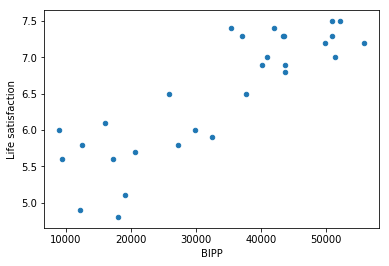

In [52]:
#Visualisieren
country_stats.plot(kind='scatter', x='BIPP', y='Life satisfaction')
plt.show()

In [53]:
#Asuwahl des Algorithmus
#Modelbasiert
#model = linear_model.LinearRegression()
#Instanzbasiert
model = neighbors.KNeighborsRegressor()

In [54]:
model.fit(x, y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [46]:
#Vorhersage treffen
x_new = [[25000]]# Pro kopf BIP für Zypern
print(model.predict(x_new))

[[5.82]]


# Schlechte Daten: Müll rein -> Müll raus

* Zu wenig Trainingsdaten
* Nicht repräsentative Trainingsdaten
* Minderwertige Daten
* Irrevelante Merkmale

## Zu wenig Trainingsdaten
Hat man sehr viele Trainingsdaten zur verfügung, dann können primitive Algorithmen ähnlich gut Vorhersagen wie komplexe Algorithmen. Dies zeigt, wie wichtig die Menge an Trainingsdaten ist.  
Allerdings sollte man die Algorithmen trotzdem nicht ausser Acht lassen, denn auch sie spielen noch eine Rolle, gerade, wenn nicht viele Trainingsdaten zur verfügung stehen.  

## Nicht repsäsentative Trainingsdaten
Die Trainingsdaten sollten mit Vorsicht erhoben werden. Etwa bei einer Umfrage über das Kaufverhalten muss darauf geachtet werden, dass alle Demografischen Gruppen befragt werden, und von allen auch eine grosse Menge.

## Minderewertige Daten
Die Daten können lückenhaft sein oder Ausreisser enthalten. Diese sollten korrigiert oder entfernt werden.  
Man könnte aber auch zwei Systeme trainieren, 1x mit den lückenhaften Daten und 1x ohne...

## Irrevelante Merkmale
* Die Merkmale sollten sorgfältig ausgewählt werden, da das System aus wesentlichen/aussagekräftigen Merkmalen lernen soll.  
* Die Merkmale könnten etwa mit Dimensionsreduktion extrahiert werden
* Neue Merkmale könnten erhoben werden.

# Schlechter Algorithmus
* Overfitting
* Underfitting

## Overfitting
Wie Menschen, so können auch Maschinen zu einer **übermässigen Verallgemeinerung** neigen, dies nennt man **Overfitting**.  
Bei ML tritt dies unter folgenden Bedingungen auf:
1. Zu komplexes Modell angesichts der Trainingsdaten:  
   * Zu komplex bedeutet z.B, dass zu viele Parameter erwartet werden.
* Zu wenig Trainingsdaten
* Zu viel Rauschen und Ausreisser(Anomalien) in den Trainingsdaten

Dem ersten kann man entgegewirken, indem man ein einfacheres Modell wählt oder man legt dem Modell Restriktionen auf, dies nennt man **Regularisieren**.  

$y=mx+q$  
$y=\Theta_0*x+\Theta_1$

Man stelle sich nun vor, man würde $\Theta_1=0$ setzen, dann wäre das Modell vereinfacht, da sich nur noch $\Theta_0$ anpassen kann beim Trainieren.  
Man spricht hier auch von **Freiheitsgraden**. Statt zwei Freiheitsgraden besitzt das Modell jetzt nur noch einen.  
Würde man $\Theta_1$ nicht gleich $0$ setzen, aber trotzdem einen kleinen Wert erzwingen, so hätte das Modell zwischen 1 und 2 Freiheitsgraden.  

Um diese Regularisierung vorzunehmen, wendet man einen **Hyperparameter** auf die **Trainingsdaten**(nicht das Modell!) an. Dieser Hyperparameter bleibt konstant.  
Ein grosser Hyperparameter verhindert zwar Overfitting, reduziert aber auch die Leistung des Systems.  

## Underfitting

Der Gegenzug von Overfitting ist Underfitting. Ursachen:
* Das Modell ist zu einfach für die Realität oder:
>Die Realität ist komplexer als das Modell

Man kann dies Beheben indem man ein komplexeres Modell wählt, welches auch fähig ist die in den Daten enthaltene Sruktur zu lernen, oder man verringert die Restriktionen des Modells(z.B. Hyperparameter verkleinern).  


# Testen und Validieren

Um die Leistung(Wie gut verallgemeinert ein trainiertes Modell auf neue Datenpunkte) zu evaluieren testet man das Modell mit neuen Datenpunkten. Die Abweichung bei diesen neuen Datenpunkten nennt man **out-of-sample-error**.  

Die Daten aufteilen:  
80% Trainingsdaten  
20% Testdaten  


Man möchte den Besten Hyperparameter für ein Modell ermitteln.  
Vorgehen:  
1. Testdaten und Trainingsdaten festlegen
* Die Trainingsdaten werden in komplementäre Untermengen eingeteilt(Trainingsdaten und Validierungsdaten).
* Jedes Modell wird mit einer anderen Kombination dieser Untermengen trainiert
* Und mit den restlichen Validiert
* Das am Besten abschneidende Modell wird nun mit den Testdaten getestet um den **Verallgemeinerungsfehler** festzulegen.

## No-Free-Lunch-Theorem
Um zu bestimmen ob ein Modell "besser oder schlechter" ist als ein anderes, so muss zwingend eine Annahme über die Daten getroffen werden. Ohne eine Annahme über die Daten sind alle Modelle gleich gut/schlecht geeignet.  
>Kein Modell ist a priori(ohne weitere Beweise, hier eine Annahme über die Daten) besser als ein anderes.

# Übungen

**Wie würden sie ML definieren?**  
>ML bedeutet Maschinen aus Daten lernen zu lassen um Vorhersagen zu treffen.

**Können sie vier Arten von Aufgaben nennen, für die Machine Learning geeignet ist?
>1. Bilder klassifizieren  
* Preis eines Produktes anhand seiner Merkmale bestimmen
* Einem Auto das Fahren beibringen
* Die Kunden in Kategorien einordnen

**Was ist ein gelabelter Trainingsdatensatz?**
> Trainingsdaten mit den erwarteten Lösungen, also den erwünschten Ergebnissen.  
z.B. Bilder welches Klassifiziert werden soll, enthalten zusätzlich die Stichworte von dem was darauf abgebildet ist.  

**Was sind die zwei verbreitetesten Aufgaben beim überwachten Lernrn?**
>1. Spamfilter für Emails
* Preisvorhersagen aufgrund von Merkmalen

**Können sie vier verbreitete Aufgaben für unüberwachtes Lernen nennen?**
>1. Erkennen von Anomalien, etwa in Kreditkartentransaktionen
* Erkennung von Assoziationen in riesigen Datenmengen, vielleicht sieht ein Modell mehr oder anderes als Menschen
* Visualisierung von riesigen Datenmengen in 2d, oder 3d Diagrammen.
* Clustering, Einteilungen anhand grosser Daten vornehmen

**Was für einen ML-Algorithmus würden sie verewnden um einen Roboter über verschiedene Unbekannte Oberflächen laufen zu lassen?**
>Einen Reinforcement-Learning Algorithmus eignet sich dazu, da er nicht direkt etwas vorhersagen muss, sondern eine Strategie lernen muss.

**Welche Art Algorithmus würden sie verwenden, um  Ihre Kunden in unterschiedliche Gruppen einzuteilen?**
>Einen Clustering oder hierarchischen Clustering Algorithmus.

**Würden sie die Aufgabe, Spam zu erkennen, als überwachte oder unüberwachte Lernaufgabe einstufen?**
>Als überwachte, das Modell soll mit bereits gelabelten E-Mails trainiert werden.

**Was ist ein Online-Lernsystem?**
>Ein System, bei welchem ständig neue Datensätze dazu trainiert werden können. Es ist Anpassungsfähig. Die Lernrate bestimmt ob das System träge sein soll oder sich schnell an die neuen Daten anpassen soll.

**Was ist Out-of-Core-Lernen?**
>Dies kann bei einem Online-Lernsystem angewendet werden. Wenn die Trainingsdaten zu gross sind um sie alle im Hauptspeicher zu halten, so wird der Trainingsdatensatz in kleine Einheiten(Batches) eingeteilt, welche dann nacheinander in den Hauptspeicher geladen, trainiert und verworfen werden.

**Welche Art Lernalgorithmus beruht auf einem Ähnlichkeitsmass, um Vorhersagen zu treffen?**
>Der k-nearest-Neighbors Algorithmus. Er ist ein überwachter Lernalgorithmus.

**Was ist der Unterschied zwischen einem Modellparameter und einem Hyperparameter eines Lernalgorithmus?**
>1. Der Modellparameter wird während des Trainigs auf das Modell angewendet. Die Modellparameter passen sich während des Lernprozesses an. Dies ist das eigentliche Lernen.
* Der Hyperparameter wird vor dem Training auf alle Trainingsdaten angewendet und kommt nie mit dem Modell selber in Berührung, er ist ausserdem konstant.

**Wonach suchen modelbasierte Lernalgorithmen? Welches ist die häufigste Strategie, die zum Erfolg führt? Wie treffen sie Vorhersagen?**
>Sie suchen nach einem Modell, welches Bestmöglich verallgemeinert und somit gute Vorhersagen auf neue unbekannte Daten treffen kann. Das Modell ist eine Gleichung mit verschiedenen trainierten Parametern, wird nun ein neuer Datensatz eingespeisst, so rechnet es aus $x$ das $y$ aus. Beim trainieren wird ständig die Leistung mithilfe einer Kosten- oder Nutzenfunktion(meist ersteres) gemessen und die Parameter des Modell werden angepasst, um die Leistung bestmöglich zu steigern.

**Können sie vier der wichtigsten Herausforderungen beim ML bennenen?**
>1. Overfitting/Underfitting
* Zu wenig Trainingsdaten
* Nicht repräsentative Trainingsdaten
* Irrelevante Merkmale

**Welches Problem liegt vor, wenn ihr Modell auf den Trainigsdaten ein sehr gute leistung erbringt, aber schlecht auf neue Daten verallgemeinert? Nennen sie drei Lösungsansätze**
>Das Problem ist Overfitting.
1. Ein einfacheres Modell wählen
* Regularisieren mithilfe von Hyperparametern
* Mehr Trainingsdaten beschaffen.

**Was ist ein Testdatensatz, und warum sollte man einen verwenden?**
>Das Modell wurde mit Trainingsdaten trainiert und wird mit diesen eine sehr hohe Leistung erzielen, allerdings ist diese nicht Repräsentativ. Die Testdaten werden verwendet um die Leistung eines Modells zu bestimmen, da sie für das Modell noch unbekannt sind und wie neue reale Daten wirken.

**Was ist der Zweck eines Validierungsdatensatzes?**
>Er hilft, aus verschiedenen Varianten/Modellen das Beste auszusuchen. Er wird aber nicht zur Bestimmung der Leistung eines Modells verwendet.

**Was kann schiefgehen, wenn sie Hyperparameter mithilfe der Testdaten einstellen?**
>Der Hyperparameter wird dann so eingestelt, dass er zwar auf diese Testdaten eine Höchstleistung erzielt. Aber das Modell kann deswegen nicht gut verallgemeinern und wird auf neue Datensätze eine weniger gute Leistung erzielen.

**Was ist Kreuzvalidierung, und warum sollten Sie diese einem Validierungsdatensatz vorziehen?**
>Dies ist ein Vorgehen um Modelle miteinander zu vergleichen, ohne das weitere Daten benötigt werden.

